Name : Meharsh Chandure <br>
Roll No. : A-36

🔧 Part 1: Advanced Data Wrangling (30 mins)
Load the data and display:

Top and bottom 3 rows.

DataFrame memory usage in MB (optimize by changing column dtypes if needed).

Detect and remove:

Exact duplicates.

Rows with more than one standard deviation below the mean in more than 3 columns.

Create new features:

acid_sugar_ratio = fixed acidity / residual sugar

sulfate_acidity = sulphates / volatile acidity

Cap values in chlorides and volatile acidity at 99th percentile using NumPy.

In [ ]:
# Load libraries
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv('/content/drive/MyDrive/winequality-red.csv', delimiter=";")

In [ ]:
# Top and bottom 3 rows
print("First 3 Rows \n")
display(df.head(3))
print("\nLast 3 Rows \n")
display(df.tail(3))

First 3 Rows 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5



Last 3 Rows 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# Memory Usage
print("Individual Memory usage \n")
ind_memory = df.memory_usage(deep=True)
print(ind_memory)
memory = df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"\nToal Memory usage (in MB) : {memory:.4f} MB")

Individual Memory usage 

Index                     132
fixed acidity           12792
volatile acidity        12792
citric acid             12792
residual sugar          12792
chlorides               12792
free sulfur dioxide     12792
total sulfur dioxide    12792
density                 12792
pH                      12792
sulphates               12792
alcohol                 12792
quality                 12792
dtype: int64

Toal Memory usage (in MB) : 0.1465 MB


In [ ]:
# Remove exact duplicate
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Removed {before - after} duplicate rows")

Removed 240 duplicate rows


In [ ]:
# Remove rows with >3 columns more than 1 std below mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
mean = df[numeric_cols].mean()
std = df[numeric_cols].std()
df_optimized = df[~((df[numeric_cols] - mean) / std).abs().gt(1).any(axis=1)]
print(f"Removed {before - df_optimized.shape[0]} rows with >3 columns more than 1 std below mean")

mask = (df_optimized[numeric_cols] < (mean - std)).sum(axis=1) > 3
df_optimized = df_optimized[~mask]
print(f"Rows remaining after outlier removal: {df_optimized.shape[0]}")

Removed 1502 rows with >3 columns more than 1 std below mean
Rows remaining after outlier removal: 97


In [ ]:
# Create new features
df_optimized['acid_sugar_ratio'] = df_optimized['fixed acidity'] / df_optimized['residual sugar']
df_optimized['sulfate_acidity'] = df_optimized['sulphates'] / df_optimized['volatile acidity']
print("New features created")


New features created


In [ ]:
chloride_cap = np.percentile(df['chlorides'], 99)
volatile_cap = np.percentile(df['volatile acidity'], 99)

df['chlorides'] = np.where(df['chlorides'] > chloride_cap, chloride_cap, df['chlorides'])
df['volatile acidity'] = np.where(df['volatile acidity'] > volatile_cap, volatile_cap, df['volatile acidity'])

# ✅ Final check
display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


📊 Part 2: Multi-level Grouping and Aggregation (30 mins)  

Bin the quality column into:

Low (<=4), Medium (5-6), and High (>=7) using pd.cut.

Using groupby and agg, compute:

Mean, std, and IQR for alcohol, sulphates, and citric acid across quality bins.

Mean difference of alcohol and volatile acidity between High and Low wines.

Create a multi-index pivot table:

Index: quality_group, Columns: quantile bins of alcohol, Values: density mean

In [ ]:
print("Binning the quality column")
bins = [0, 4, 6, 10]  # Bins: (0-4] → Low, (4-6] → Medium, (6-10] → High
labels = ['Low', 'Medium', 'High']
df['quality_group'] = pd.cut(df['quality'], bins=bins, labels=labels, right=True)
print(df['quality_group'].value_counts())

Binning the quality column
quality_group
Medium    1112
High       184
Low         63
Name: count, dtype: int64


In [ ]:
def iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)

agg_results = df.groupby('quality_group')[['alcohol', 'sulphates', 'citric acid']].agg(['mean', 'std', iqr])
display(agg_results)

/tmp/ipython-input-32-380672604.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_results = df.groupby('quality_group')[['alcohol', 'sulphates', 'citric acid']].agg(['mean', 'std', iqr])


alcohol                sulphates                    \
                    mean       std  iqr      mean       std     iqr   
quality_group                                                         
Low            10.215873  0.918178  1.4  0.592222  0.224323  0.1050   
Medium         10.259173  0.987294  1.4  0.648094  0.168007  0.1600   
High           11.552808  1.012276  1.5  0.745598  0.133926  0.1625   

              citric acid                  
                     mean       std   iqr  
quality_group                              
Low              0.173651  0.207406  0.25  
Medium           0.261286  0.189294  0.32  
High             0.372880  0.193280  0.19

In [ ]:
high_wines = df[df['quality_group'] == 'High']
low_wines = df[df['quality_group'] == 'Low']

alcohol_diff = high_wines['alcohol'].mean() - low_wines['alcohol'].mean()
volatile_diff = high_wines['volatile acidity'].mean() - low_wines['volatile acidity'].mean()

print(f"Mean Alcohol Difference (High - Low): {alcohol_diff:.3f}")
print(f"Mean Volatile Acidity Difference (High - Low): {volatile_diff:.3f}")

Mean Alcohol Difference (High - Low): 1.337
Mean Volatile Acidity Difference (High - Low): -0.303


In [ ]:
df['alcohol_bin'] = pd.qcut(df['alcohol'], q=4, duplicates='drop')

pivot_table = df.pivot_table(
    index='quality_group',
    columns='alcohol_bin',
    values='density',
    aggfunc='mean'
)

display(pivot_table)

/tmp/ipython-input-34-701774166.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


alcohol_bin,"(8.399000000000001, 9.5]","(9.5, 10.2]","(10.2, 11.1]","(11.1, 14.9]"
quality_group,,,,
Low,0.997421,0.997079,0.996264,0.995595
Medium,0.997478,0.997214,0.996824,0.995146
High,0.997883,0.997429,0.997163,0.995260


📈 Part 3: Advanced Visual Exploration (45 mins)

Plot customized visuals:

Overlay KDE plots for alcohol by quality_group.

Plot violin plots for residual sugar grouped by quality_group and hue on binned pH.

Generate a heatmap showing:

Pearson and Spearman correlations side-by-side (subplot), sorted by correlation with quality.

Create a diverging bar chart showing:

Z-scores of mean alcohol, citric acid, and density by quality levels.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, spearmanr

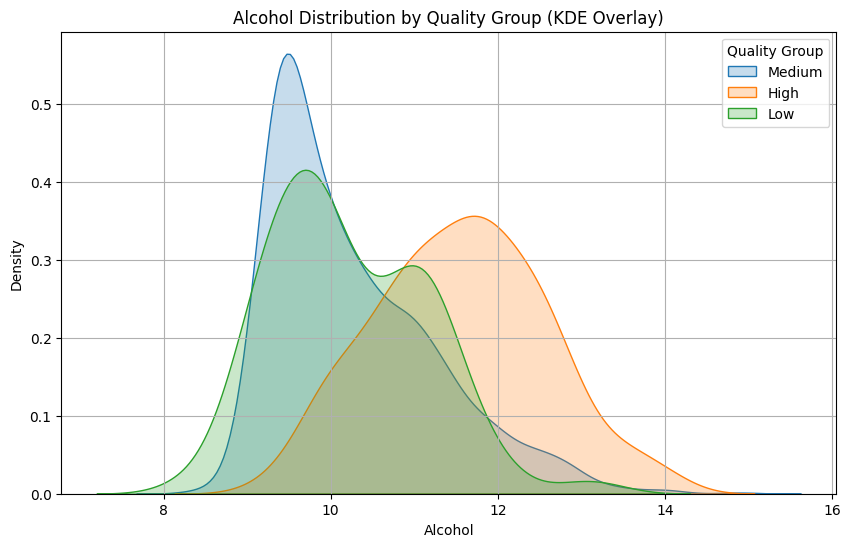

In [ ]:
# KDE plots by group
plt.figure(figsize=(10, 6))
for label in df['quality_group'].unique():
    sns.kdeplot(data=df[df['quality_group'] == label], x='alcohol', label=label, fill=True)
plt.title('Alcohol Distribution by Quality Group (KDE Overlay)')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.legend(title='Quality Group')
plt.grid(True)
plt.show()

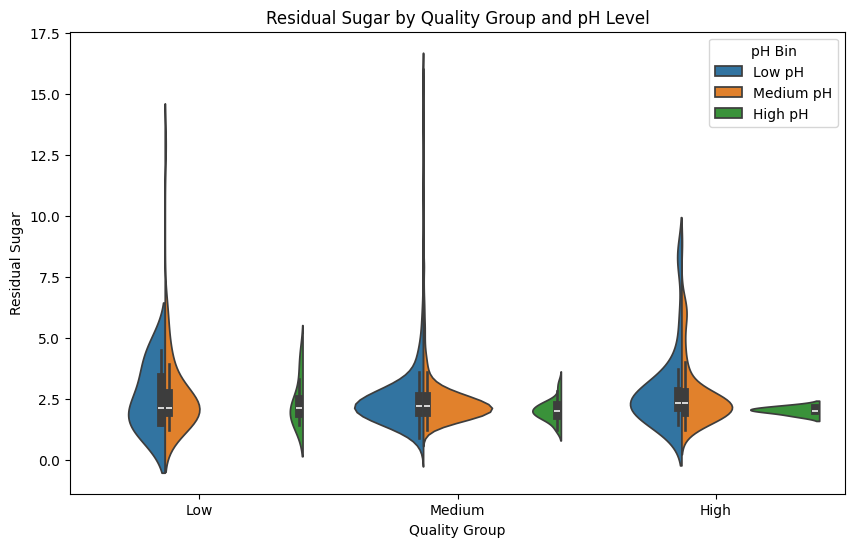

In [ ]:
# Violin plot for residual sugar by quality_group and pH bins
df['pH_bin'] = pd.cut(df['pH'], bins=3, labels=['Low pH', 'Medium pH', 'High pH'])

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='quality_group', y='residual sugar', hue='pH_bin', split=True)
plt.title('Residual Sugar by Quality Group and pH Level')
plt.xlabel('Quality Group')
plt.ylabel('Residual Sugar')
plt.legend(title='pH Bin')
plt.show()

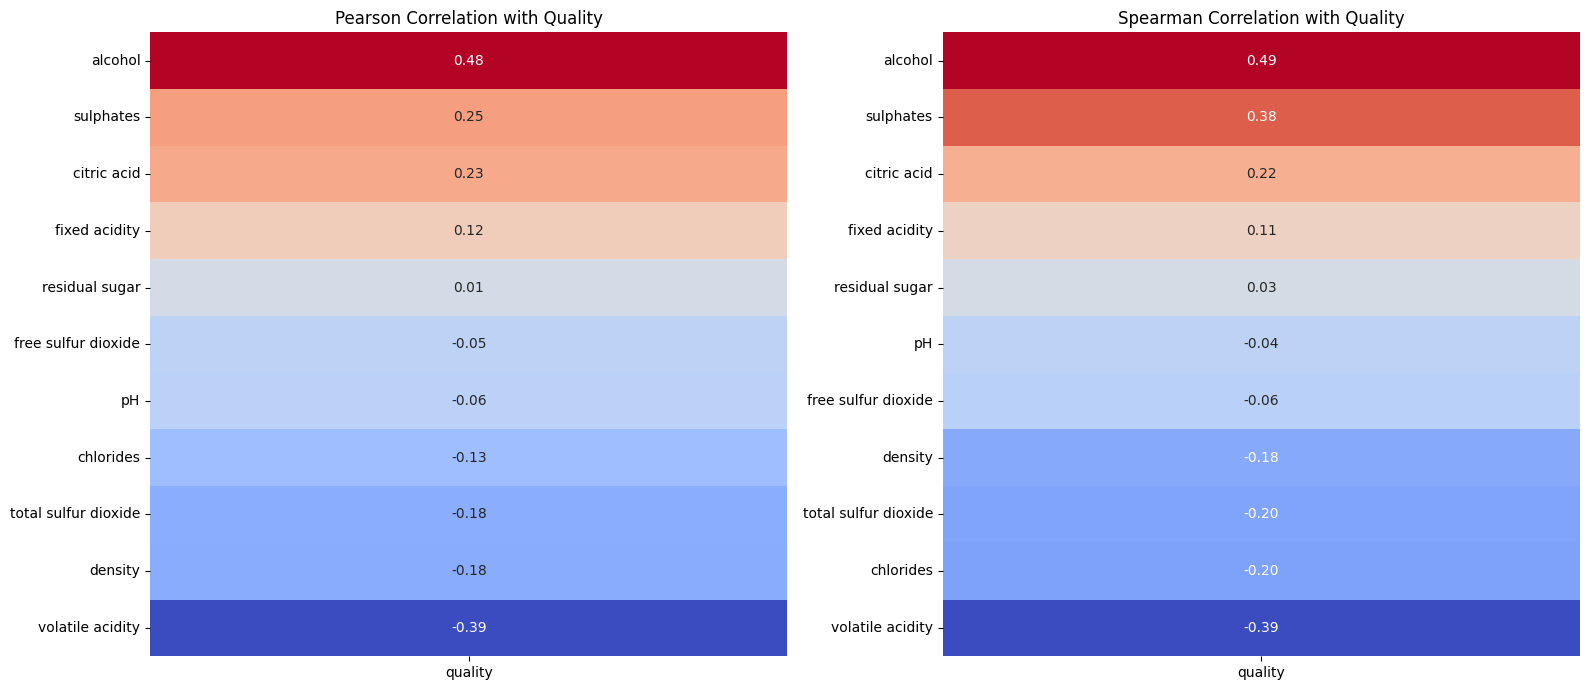

In [ ]:
# Calculate correlations
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
pearson_quality_corr = correlation_matrix['quality'].drop('quality').sort_values(ascending=False)
spearman_quality_corr = numeric_df.corr(method='spearman')['quality'].drop('quality').sort_values(ascending=False)


plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
sns.heatmap(pearson_quality_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Pearson Correlation with Quality')
plt.yticks(rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(spearman_quality_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Spearman Correlation with Quality')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

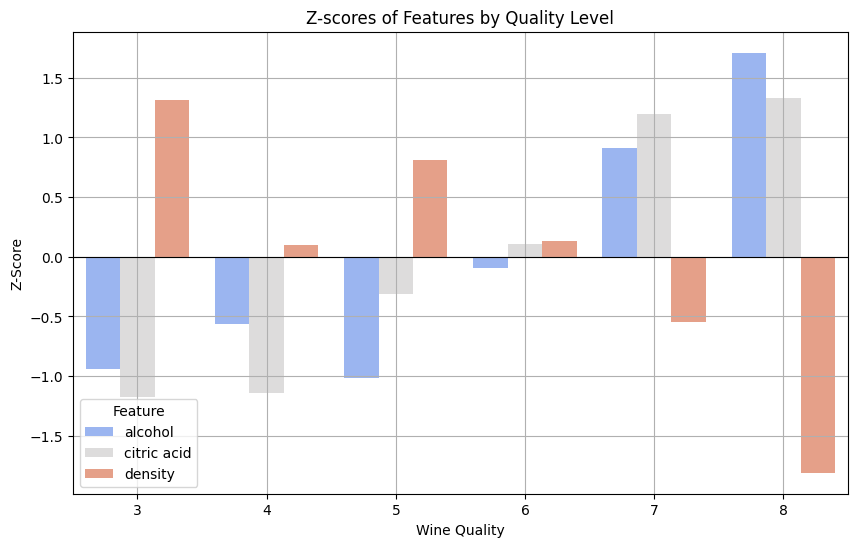

In [ ]:
# Diverging bar chart
group_means = df.groupby('quality')[['alcohol', 'citric acid', 'density']].mean()

# Apply Z-score
group_z = group_means.apply(zscore)

# Reshape and plot
z_df = group_z.reset_index().melt(id_vars='quality', var_name='Feature', value_name='Z-Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=z_df, x='quality', y='Z-Score', hue='Feature', palette='coolwarm')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Z-scores of Features by Quality Level')
plt.xlabel('Wine Quality')
plt.ylabel('Z-Score')
plt.legend(title='Feature')
plt.grid(True)
plt.show()

🔬 Part 4: Outlier Strategies and Detection (30 mins)

Implement 3 different outlier detection methods on total sulfur dioxide:

IQR method

Z-score method (NumPy)

MAD (Median Absolute Deviation)

Compare how many outliers are detected per method and create a Venn diagram of overlapping ones (use set logic).

Remove the most extreme outliers (intersection of all methods) and compare group-wise means before and after.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Focus column
tsd = df['total sulfur dioxide']

In [ ]:
# IQR Method
Q1 = tsd.quantile(0.25)
Q3 = tsd.quantile(0.75)
IQR = Q3 - Q1
lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR

outliers_iqr = df[(tsd < lower_iqr) | (tsd > upper_iqr)].index

In [ ]:
# Z-Score Method
mean = tsd.mean()
std = tsd.std()
z_scores = (tsd - mean) / std

outliers_z = df[(np.abs(z_scores) > 3)].index

In [ ]:
# MAD
median = tsd.median()
mad = np.median(np.abs(tsd - median))
modified_z_scores = 0.6745 * (tsd - median) / mad

outliers_mad = df[np.abs(modified_z_scores) > 3.5].index

In [ ]:
print(f"Outliers detected by IQR method: {len(outliers_iqr)}")
print(f"Outliers detected by Z-score method: {len(outliers_z)}")
print(f"Outliers detected by MAD method: {len(outliers_mad)}")

Outliers detected by IQR method: 45
Outliers detected by Z-score method: 12
Outliers detected by MAD method: 27


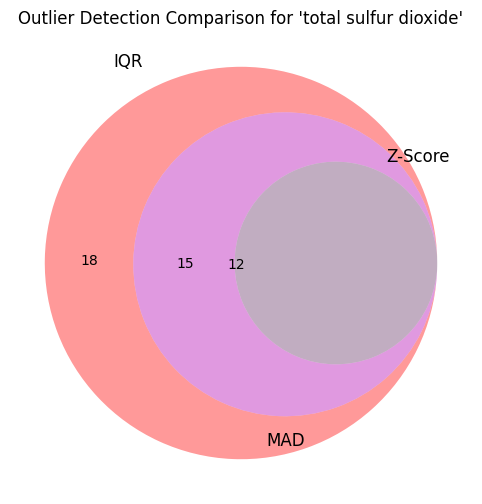

In [ ]:
from matplotlib_venn import venn3

# Convert to sets
set_iqr = set(outliers_iqr)
set_z = set(outliers_z)
set_mad = set(outliers_mad)

plt.figure(figsize=(8, 6))
venn3([set_iqr, set_z, set_mad], set_labels=('IQR', 'Z-Score', 'MAD'))
plt.title("Outlier Detection Comparison for 'total sulfur dioxide'")
plt.show()

In [ ]:
# Intersection of all three methods
extreme_outliers = set_iqr & set_z & set_mad

print(f"Extreme outliers in all 3 methods: {len(extreme_outliers)}")

# Group-wise means before removal
before_means = df.groupby('quality_group')[['total sulfur dioxide']].mean()

# Drop extreme outliers
df_cleaned = df.drop(index=extreme_outliers)

# Group-wise means after removal
after_means = df_cleaned.groupby('quality_group')[['total sulfur dioxide']].mean()

# Combine for comparison
mean_comparison = pd.concat([before_means, after_means], axis=1)
mean_comparison.columns = ['Before Removal', 'After Removal']
display(mean_comparison)

Extreme outliers in all 3 methods: 12


/tmp/ipython-input-69-3097538385.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  before_means = df.groupby('quality_group')[['total sulfur dioxide']].mean()
/tmp/ipython-input-69-3097538385.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  after_means = df_cleaned.groupby('quality_group')[['total sulfur dioxide']].mean()


,Before Removal,After Removal
quality_group,,
Low,34.444444,34.444444
Medium,49.424910,48.483212
High,35.358696,32.631868


from matplotlib import pyplot as plt
mean_comparison['Before Removal'].plot(kind='hist', bins=20, title='Before Removal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
mean_comparison['After Removal'].plot(kind='hist', bins=20, title='After Removal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
mean_comparison.plot(kind='scatter', x='Before Removal', y='After Removal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
mean_comparison['Before Removal'].plot(kind='line', figsize=(8, 4), title='Before Removal')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
mean_comparison['After Removal'].plot(kind='line', figsize=(8, 4), title='After Removal')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
def feature_stats(df, col):
    stats = {
        'Skewness': df[col].skew(),
        'Kurtosis': df[col].kurt(),
        '95th Percentile': df[col].quantile(0.95),
        'Missing %': df[col].isnull().mean() * 100
    }
    return pd.Series(stats)

print(feature_stats(df_optimized, 'alcohol'))

Skewness            0.454790
Kurtosis           -0.825198
95th Percentile    11.200000
Missing %           0.000000
dtype: float64


In [ ]:
import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"⏱️ Function '{func.__name__}' executed in {end - start:.2f} seconds.")
        return result
    return wrapper

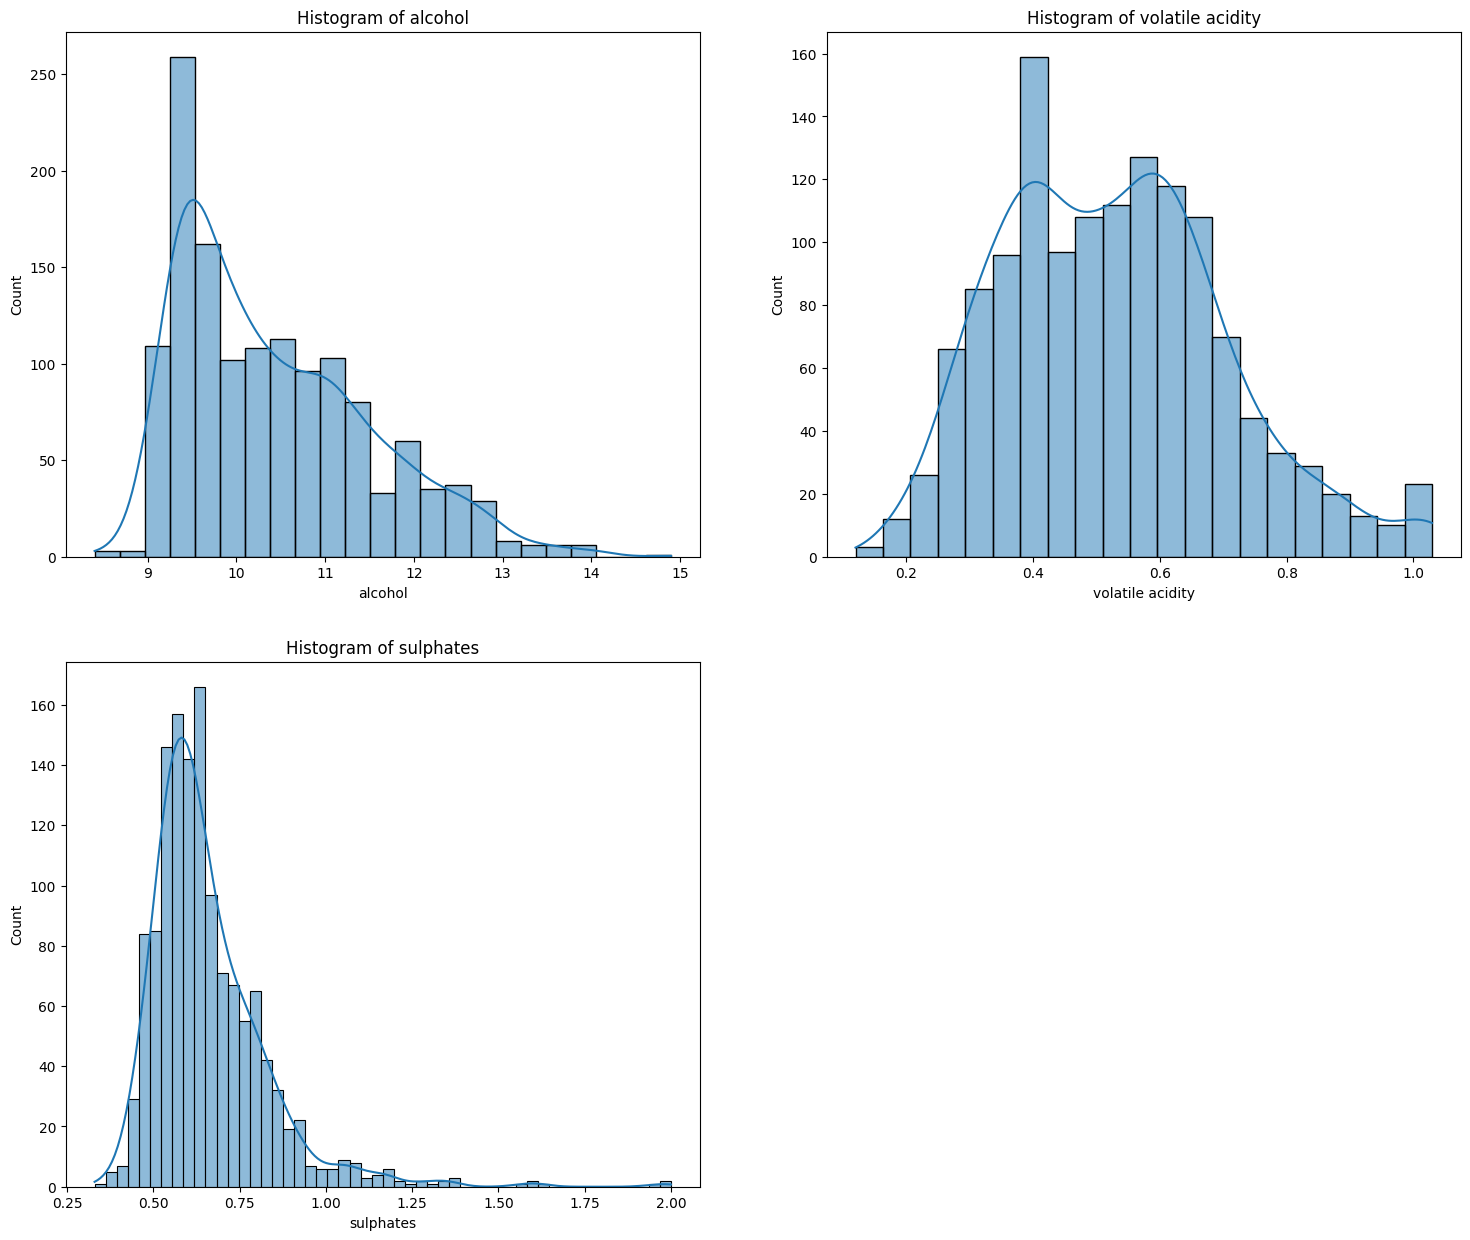

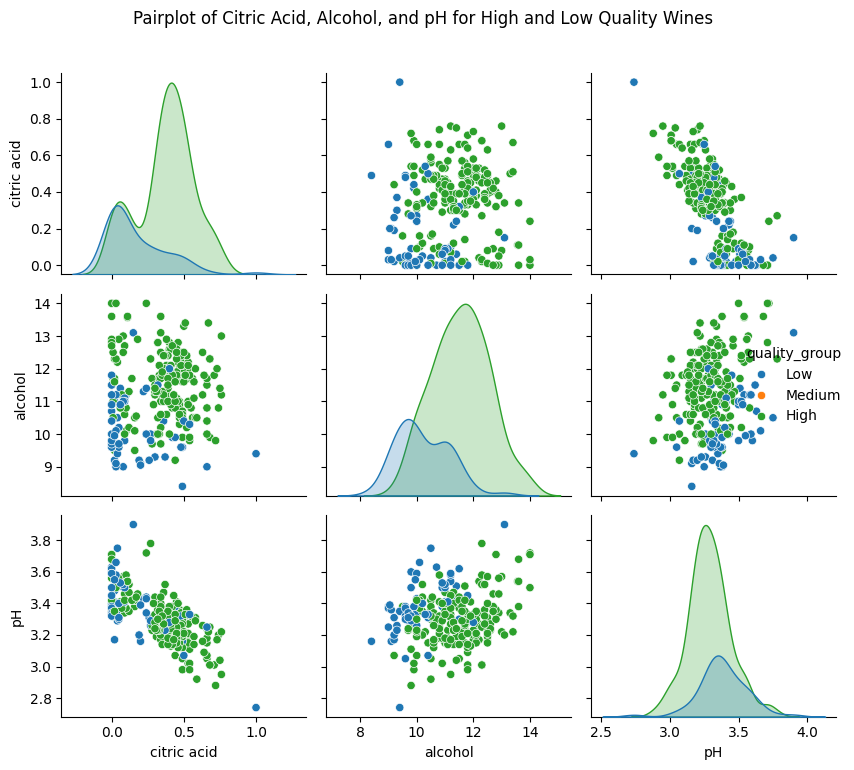

⏱️ Function 'create_dashboard' executed in 5.33 seconds.

Stats for 'alcohol':


,0
Skewness,0.859841
Kurtosis,0.159739
95th Percentile,12.500000
Missing %,0.000000



Stats for 'volatile acidity':


,0
Skewness,0.475382
Kurtosis,-0.046944
95th Percentile,0.850500
Missing %,0.000000


In [ ]:
# Dashboard
@timeit # Apply timing decorator to the dashboard function
def create_dashboard(df, pearson_quality_corr, spearman_quality_corr):
    """
    Creates a dashboard with subplots for visualizations.

    Args:
        df (pd.DataFrame): The input DataFrame.
        pearson_quality_corr (pd.Series): Pearson correlations with quality.
        spearman_quality_corr (pd.Series): Spearman correlations with quality.
    """
    fig, axes = plt.subplots(2, 2, figsize=(18, 15))
    axes = axes.flatten() # Flatten the 2x2 grid to easily iterate

    # Histograms of top 3 correlated features with quality (using Pearson correlation for feature selection)
    top_3_pearson = pearson_quality_corr.abs().sort_values(ascending=False).head(3).index.tolist()
    for i, col in enumerate(top_3_pearson):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')

    # A single pairplot of only High and Low quality wines with citric acid, alcohol, and pH
    high_low_quality_df = df[df['quality_group'].isin(['High', 'Low'])]
    # The pairplot creates its own figure, so we don't use the 'axes' from subplots here
    sns.pairplot(high_low_quality_df, vars=['citric acid', 'alcohol', 'pH'], hue='quality_group', diag_kind='kde')
    plt.suptitle('Pairplot of Citric Acid, Alcohol, and pH for High and Low Quality Wines', y=1.02) # Add title to the pairplot figure


    # Remove the remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Get correlations with quality and sort (needed for the dashboard function)
numeric_df = df.select_dtypes(include=np.number)
pearson_corr = numeric_df.corr(method='pearson').unstack().sort_values(kind="quicksort", ascending=False)
spearman_corr = numeric_df.corr(method='spearman').unstack().sort_values(kind="quicksort", ascending=False)
pearson_quality_corr = pearson_corr.loc[('quality')].drop('quality').sort_values(ascending=False)
spearman_quality_corr = spearman_corr.loc[('quality')].drop('quality').sort_values(ascending=False)

# Create the dashboard
create_dashboard(df, pearson_quality_corr, spearman_quality_corr)

# Example usage of feature_stats function
print("\nStats for 'alcohol':")
display(feature_stats(df, 'alcohol'))
print("\nStats for 'volatile acidity':")
display(feature_stats(df, 'volatile acidity'))